# Einführung in Machine Learning

# Grundidee des Supervised Machine Learnings
![Machine Learning](https://djcordhose.github.io/ai/img/sketch/ml.jpg "Machine Learning")
### Grundhoffnung: Generalisierung auf bisher unbekannte Daten und Situationen

# Häufiger Anwendungsfall: Klassifikation
![Machine Learning Classification](https://djcordhose.github.io/ai/img/sketch/classification.jpg "Machine Learning Classification")

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pylab as plt
import numpy as np

In [4]:
from distutils.version import StrictVersion

In [5]:
import sklearn
print(sklearn.__version__)

assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

0.18.1


In [6]:
# Evtl. hat Azure nur 0.19, wir brauchen aber .20 für das Plotting, dann das hier installieren und Notebook neu starten
# !conda update pandas -y

In [7]:
import pandas as pd
print(pd.__version__)

assert StrictVersion(pd.__version__) >= StrictVersion('0.20.0')

0.20.1


# Der Klassiker als Beispiel: Lilien anhand von Blütengrößen unterscheiden

## Zuerst laden wir den Iris Datensatz und verschaffen uns einen ersten Eindruck
https://de.wikipedia.org/wiki/Portal:Statistik/Datensaetze#Iris

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()

In [9]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [10]:
X = iris.data
y = iris.target

In [11]:
X.shape, y.shape

((150, 4), (150,))

In [12]:
X[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [13]:
y[0]

0

In [14]:
X_sepal_length = X[:, 0]
X_sepal_width =  X[:, 1]
X_petal_length = X[:, 2]
X_petal_width = X[:, 3]

In [15]:
X_petal_width.shape

(150,)

## Nur eine Art ist linear von den beiden anderen trennbar

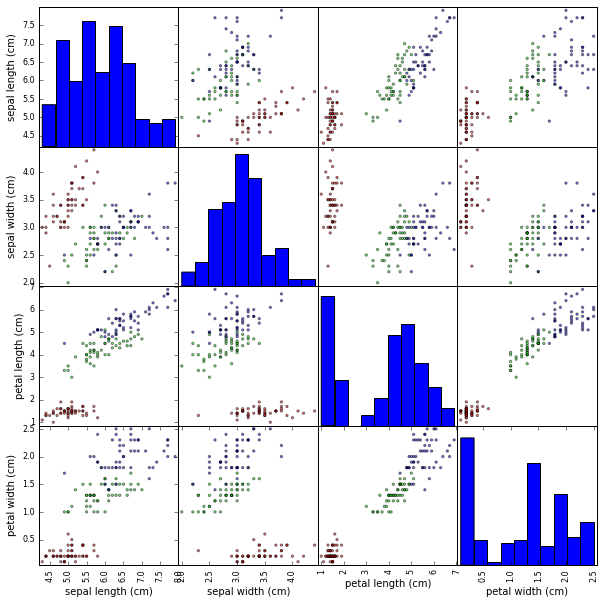

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
CMAP = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
pd.plotting.scatter_matrix(iris_df, c=iris.target, edgecolor='black', figsize=(10, 10), cmap=CMAP)
plt.show()

## Aufteilung der Daten in Training (60%) und Test (40%)
http://scikit-learn.org/stable/modules/cross_validation.html

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((90, 4), (90,), (60, 4), (60,))

## Wir trainieren einen einfachen KNN Klassifikator mit 2 Features und überprüfen die Ergebnisse
http://scikit-learn.org/stable/modules/neighbors.html#classification

In [20]:
from sklearn import neighbors

In [21]:
# ignore this, it is just technical code
# should come from a lib, consider it to appear magically 
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
font_size=25

def meshGrid(x_data, y_data):
    h = .02  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, colors, title="", mesh=True):
    xx,yy = meshGrid(x_data, y_data)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(20,10))
    if mesh:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(x_data, y_data, c=colors, cmap=cmap_bold, s=80, marker='o')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)

### Zuerst für die Sepal Features

In [22]:
X_train_sepal_only = X_train[:, :2]
X_test_sepal_only = X_test[:, :2]

In [23]:
clf_sepal = neighbors.KNeighborsClassifier(1)
clf_sepal.fit(X_train_sepal_only, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

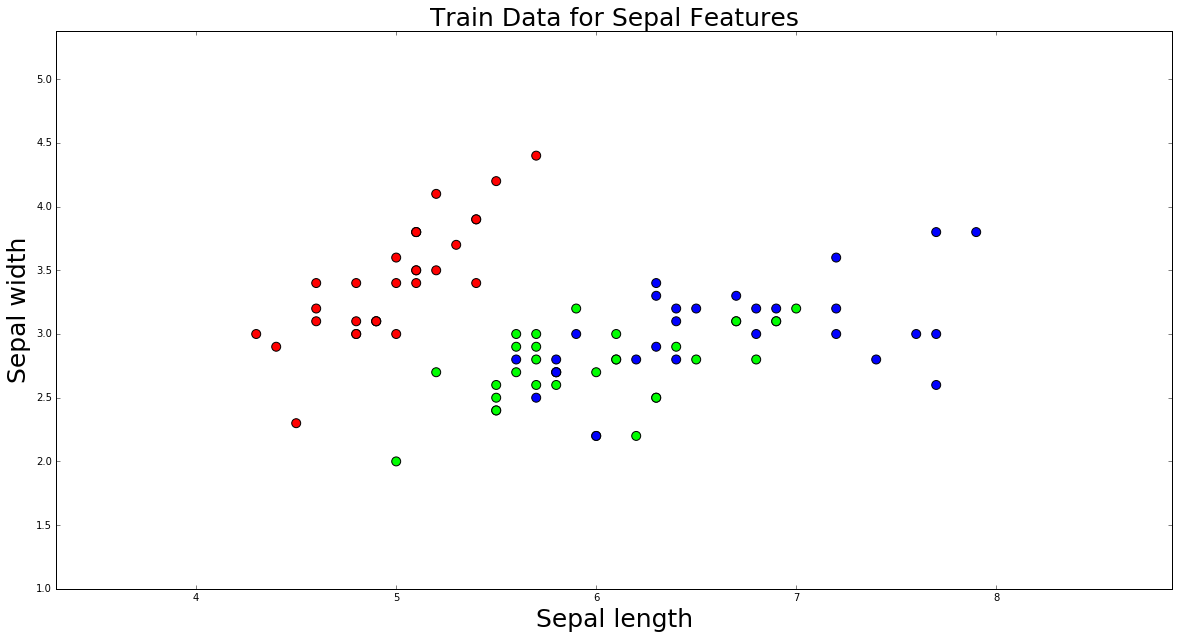

In [24]:
plotPrediction(clf_sepal, X_train_sepal_only[:, 0], X_train_sepal_only[:, 1], 
               'Sepal length', 'Sepal width', y_train, mesh=False,
                title="Train Data for Sepal Features")

In [25]:
sample_id = 8
sample_feature = X_train_sepal_only[sample_id]
sample_label = y_test[sample_id]

In [26]:
sample_feature

array([ 7.2,  3. ])

In [27]:
sample_label

2

In [28]:
clf_sepal.predict([sample_feature])

array([2])

### Generalisierung funktioniert grundsätzlich

In [29]:
clf_sepal.predict([[7.5, 2.7]]) # slightly different from above, still gives 2

array([2])

### Scores sind gut für die Trainingsdaten, aber nicht so toll für Testdaten, Overfitting

In [30]:
clf_sepal.score(X_train_sepal_only, y_train)

0.9555555555555556

In [31]:
clf_sepal.score(X_test_sepal_only, y_test)

0.80000000000000004

## Um zu versehen, was durch das Training passiert ist, zeichnen wir die Decision Boundaries ein

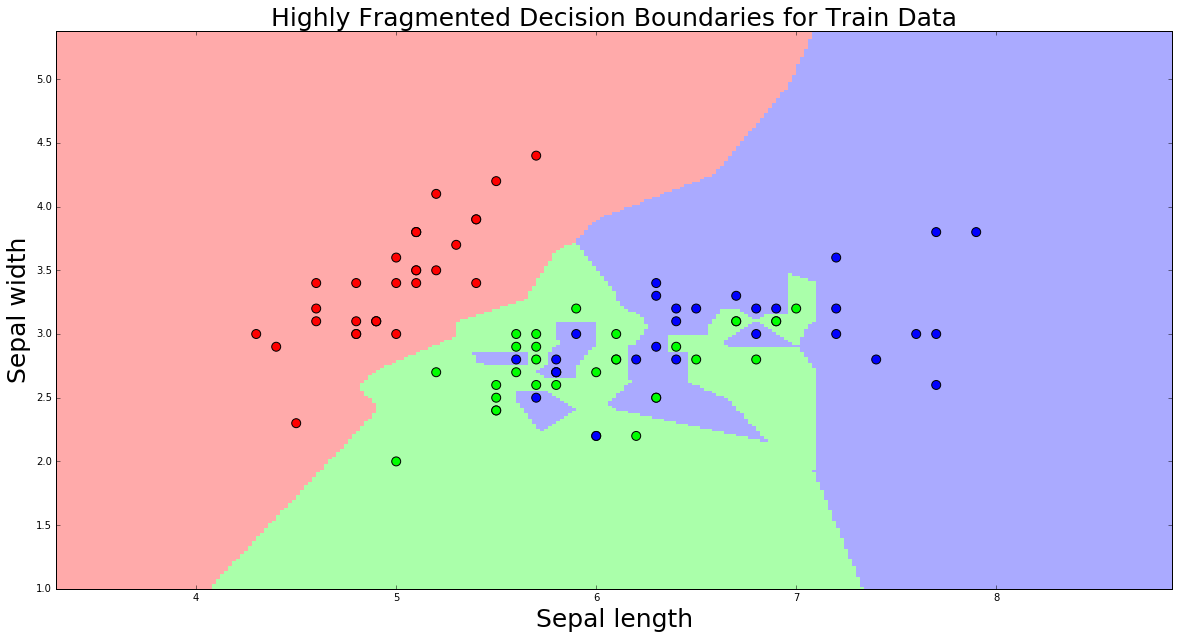

In [32]:
plotPrediction(clf_sepal, X_train_sepal_only[:, 0], X_train_sepal_only[:, 1], 
               'Sepal length', 'Sepal width', y_train,
               title="Highly Fragmented Decision Boundaries for Train Data")

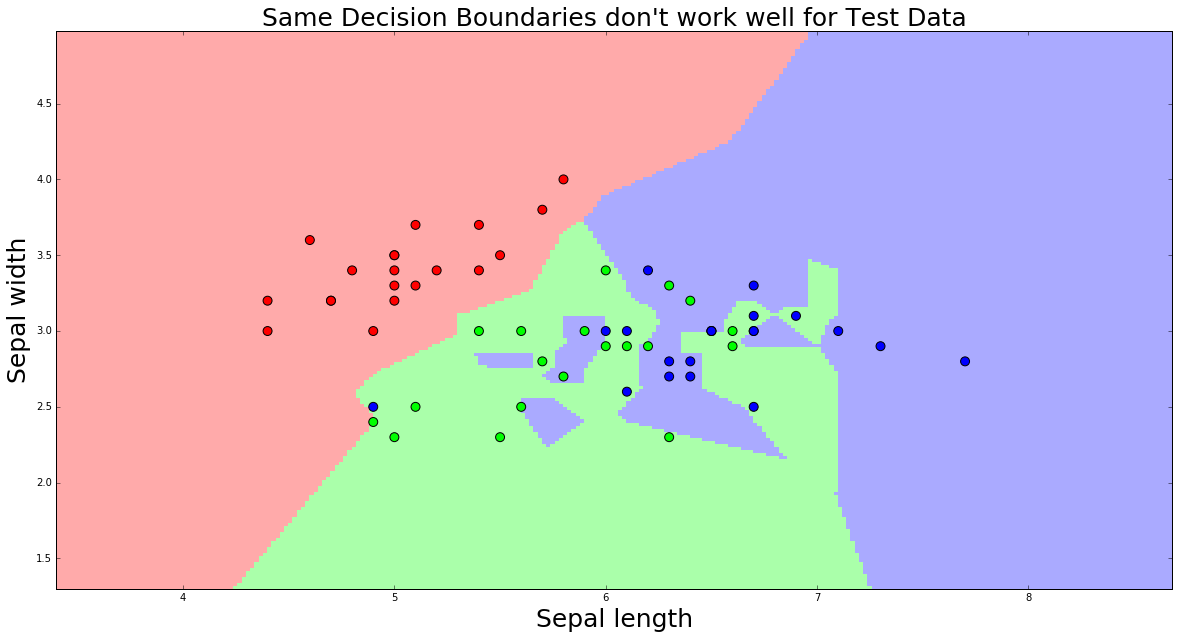

In [33]:
plotPrediction(clf_sepal, X_test_sepal_only[:, 0], X_test_sepal_only[:, 1],
               'Sepal length', 'Sepal width', y_test,
               title="Same Decision Boundaries don't work well for Test Data")

## Wir machen das Modell weniger komplex, allgemeiner

In [34]:
clf_sepal_10 = neighbors.KNeighborsClassifier(10)
clf_sepal_10.fit(X_train_sepal_only, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [35]:
clf_sepal_10.score(X_train_sepal_only, y_train)

0.80000000000000004

In [36]:
clf_sepal_10.score(X_test_sepal_only, y_test)

0.76666666666666672

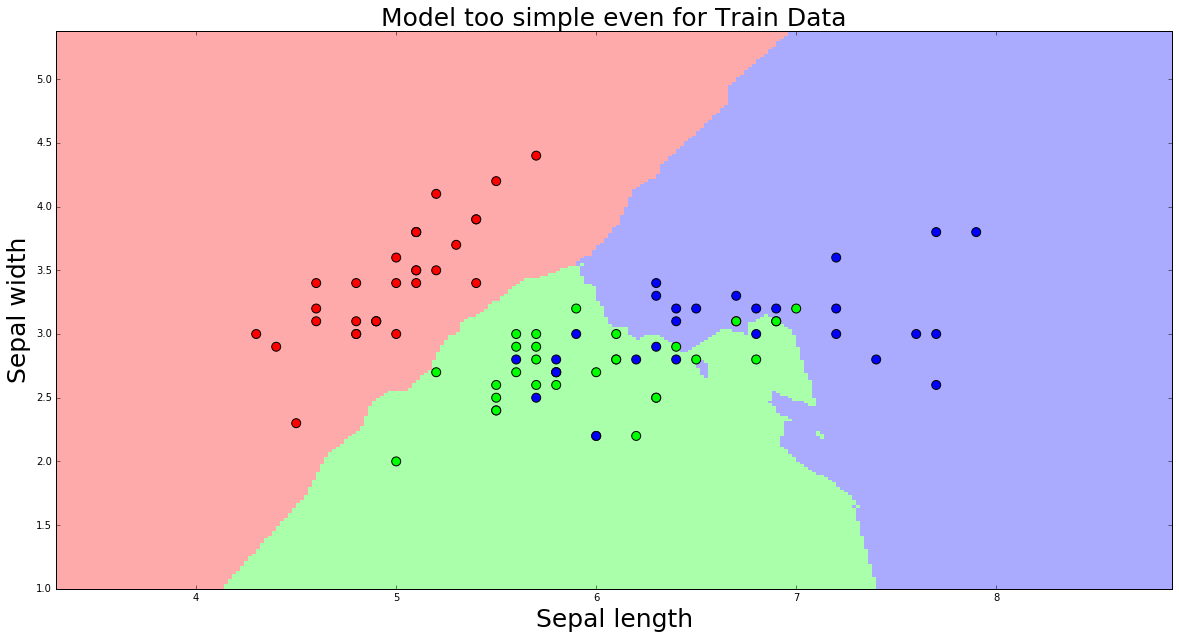

In [37]:
plotPrediction(clf_sepal_10, X_train_sepal_only[:, 0], X_train_sepal_only[:, 1], 
               'Sepal length', 'Sepal width', y_train,
               title="Model too simple even for Train Data")

## Mit den Sepal Features werden wir immer entweder overfitten oder underfitten
## Wir versuchen es noch einmal mit den Petal Features

In [38]:
X_train_petal_only = X_train[:, 2:]
X_test_petal_only = X_test[:, 2:]

In [39]:
clf_petal_10 = neighbors.KNeighborsClassifier(10)
clf_petal_10.fit(X_train_petal_only, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

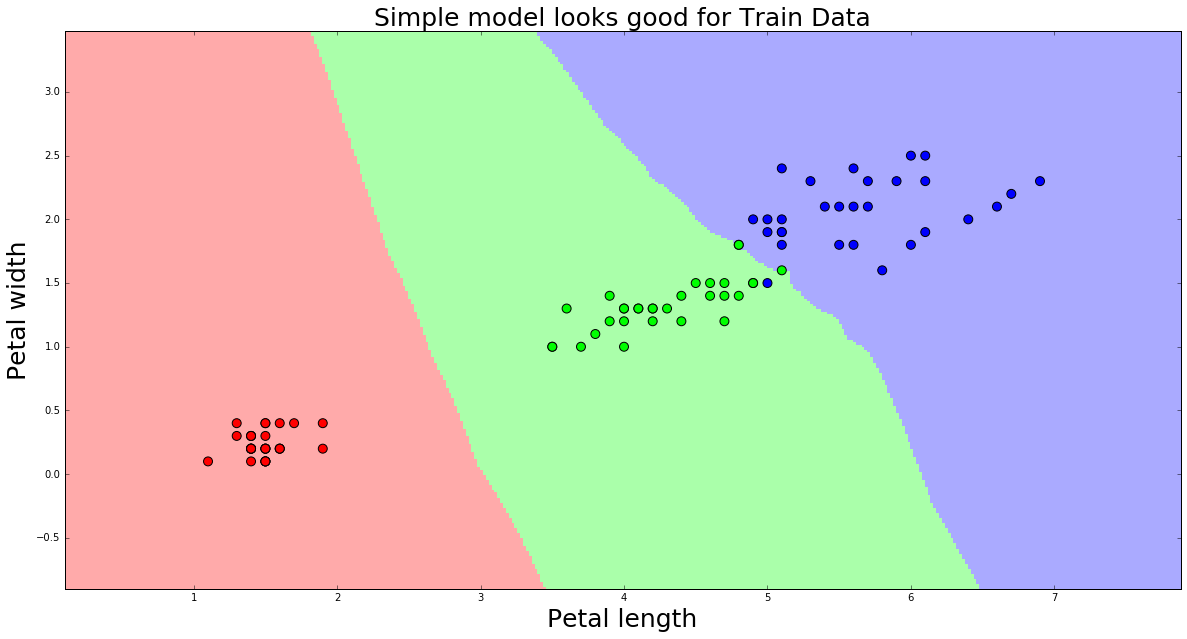

In [40]:
plotPrediction(clf_petal_10, X_train_petal_only[:, 0], X_train_petal_only[:, 1], 
               'Petal length', 'Petal width', y_train,
               title="Simple model looks good for Train Data")

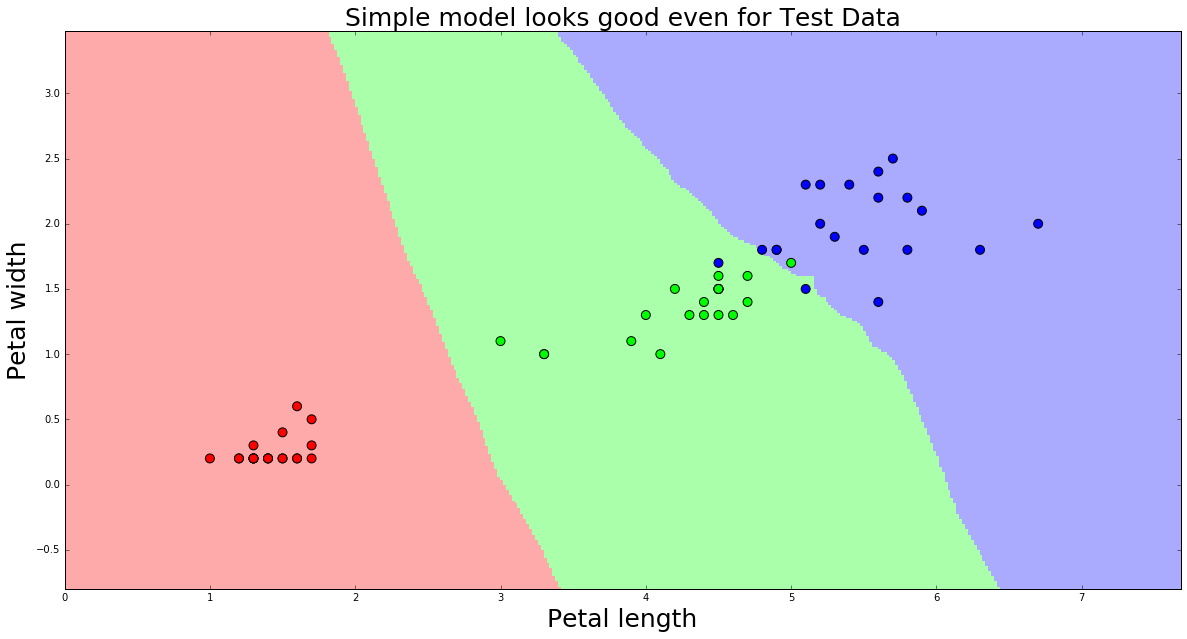

In [41]:
plotPrediction(clf_petal_10, X_test_petal_only[:, 0], X_test_petal_only[:, 1], 
               'Petal length', 'Petal width', y_test,
               title="Simple model looks good even for Test Data")

In [42]:
clf_petal_10.score(X_train_petal_only, y_train)

0.96666666666666667

In [43]:
clf_petal_10.score(X_test_petal_only, y_test)

0.94999999999999996

## Das klappt schon erstaunlich gut, aber was kriegen wir mit allen 4 Features hin?

In [44]:
clf = neighbors.KNeighborsClassifier(1)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [45]:
clf.score(X_train, y_train)

1.0

In [46]:
clf.score(X_test, y_test)

0.94999999999999996